In [1]:
from tables import start
start()

In [3]:
import pandas as pd
tab1 = pd.read_csv("tables/323_1.tab", sep="\t")
tab2 = pd.read_csv("tables/323_2.tab", sep="\t")
tab3 = pd.read_csv("tables/323_3.tab", sep="\t")
tab4 = pd.read_csv("tables/323_4.tab", sep="\t")

In [4]:
from prac_code.value import Value
tab1["U"] = tab1["U"].apply(Value)
tab1["I"] = tab1["I"].apply(Value)
tab1["U"] += Value(values=[0.0], syst=0.0005)
tab1["I"] += Value(values=[0.0], syst=0.005)

In [5]:
tab1
#прямая ветвь

,U,I
0,0.0000 ± 0.0005,0.000 ± 0.005
1,0.3260 ± 0.0005,0.000 ± 0.005
2,0.6120 ± 0.0005,0.260 ± 0.005
3,0.6290 ± 0.0005,0.420 ± 0.005
4,0.6400 ± 0.0005,0.600 ± 0.005
5,0.6490 ± 0.0005,0.800 ± 0.005
6,0.6550 ± 0.0005,0.980 ± 0.005
7,0.6760 ± 0.0005,2.060 ± 0.005
8,0.6880 ± 0.0005,3.070 ± 0.005
9,0.6970 ± 0.0005,4.070 ± 0.005


In [6]:
tab2["U"] = tab2["U"].apply(Value)
tab2["I"] = tab2["I"].apply(Value)
tab2["U"] += Value(values=[0.0], syst=0.005)
tab2["I"] += Value(values=[0.0], syst=0.005)

In [7]:
tab2
#обратная

,U,I
0,-1.050 ± 0.005,0.000 ± 0.005
1,-2.050 ± 0.005,0.000 ± 0.005
2,-3.080 ± 0.005,0.000 ± 0.005
3,-4.090 ± 0.005,0.000 ± 0.005
4,-5.000 ± 0.005,0.000 ± 0.005
5,-6.090 ± 0.005,0.000 ± 0.005
6,-7.550 ± 0.005,0.000 ± 0.005
7,-7.930 ± 0.005,-2.080 ± 0.005
8,-7.940 ± 0.005,-4.150 ± 0.005
9,-7.960 ± 0.005,-6.650 ± 0.005


In [8]:
tab3["U"] = tab3["U"].apply(Value)
tab3["C"] = tab3["C"].apply(Value)
tab3["U"] += Value(values=[0.0], syst=0.005)
tab3["C"] += Value(values=[0.0], syst=0.005)

In [9]:
tab3

,U,C
0,-0.030 ± 0.005,0.280 ± 0.005
1,-0.510 ± 0.005,0.160 ± 0.005
2,-1.040 ± 0.005,0.100 ± 0.005
3,-1.510 ± 0.005,0.060 ± 0.005
4,0.100 ± 0.005,0.380 ± 0.005
5,0.150 ± 0.005,0.440 ± 0.005


In [10]:
tab4["U"] = tab4["U"].apply(Value)
tab4["t"] = tab4["t"].apply(Value)
tab4["U"] += Value(values=[0.0], syst=0.0005)
tab4["t"] += Value(values=[0.0], syst=0.5)

In [11]:
tab4

,t,U
0,23.0 ± 0.5,0.7040 ± 0.0005
1,40.0 ± 0.5,0.6700 ± 0.0005
2,60.0 ± 0.5,0.6400 ± 0.0005
3,80.0 ± 0.5,0.6000 ± 0.0005


In [12]:
tab1[tab1["U"] > Value(0.6)]

,U,I
2,0.6120 ± 0.0005,0.260 ± 0.005
3,0.6290 ± 0.0005,0.420 ± 0.005
4,0.6400 ± 0.0005,0.600 ± 0.005
5,0.6490 ± 0.0005,0.800 ± 0.005
6,0.6550 ± 0.0005,0.980 ± 0.005
7,0.6760 ± 0.0005,2.060 ± 0.005
8,0.6880 ± 0.0005,3.070 ± 0.005
9,0.6970 ± 0.0005,4.070 ± 0.005
10,0.7040 ± 0.0005,5.050 ± 0.005
11,0.7100 ± 0.0005,6.120 ± 0.005


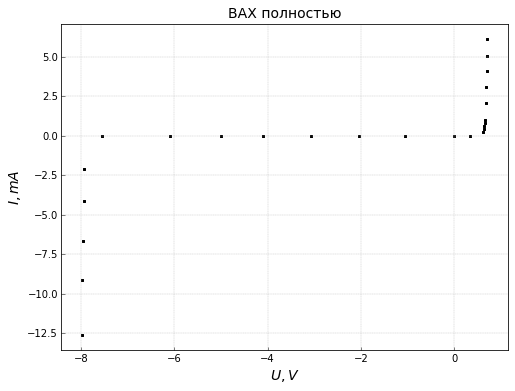

[]

In [14]:
%matplotlib inline
#ВАХ полностью
tabFull = tab1.append(tab2, ignore_index=True)
from prac_code.plotter import Plotter
Plotter(draw_legend=False).set_name("323IUFull").set_title("ВАХ полностью").set_y_name("$I, mA$").set_x_name(
        "$U, V$"). \
        add_line(Plotter.get_new_line(y_value=tabFull['I'], x_value=tabFull["U"],
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)

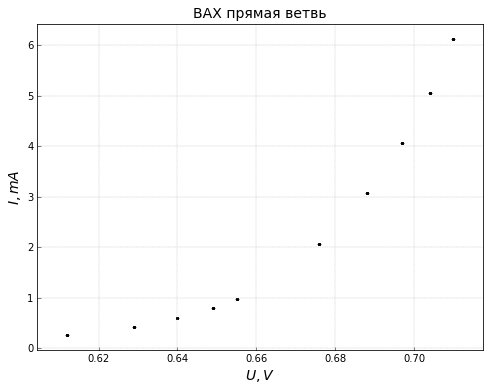

[]

In [15]:
Plotter(draw_legend=False).set_name("323IULine").set_title("ВАХ прямая ветвь").set_y_name("$I, mA$").set_x_name(
        "$U, V$"). \
        add_line(Plotter.get_new_line(y_value=tab1[tab1['U'] > 0.6]['I'], x_value=tab1[tab1['U'] > 0.6]["U"],
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)

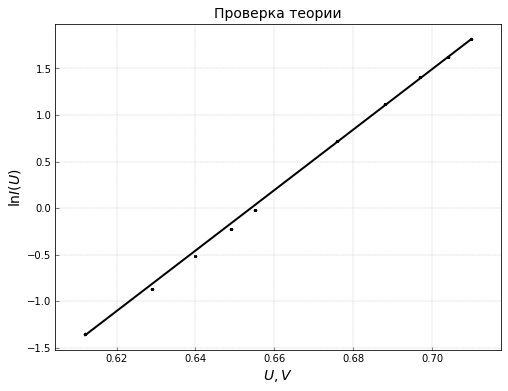

In [16]:
from sympy import log
import numpy as np
f = np.vectorize(lambda v: v.use_func(log))
fit = Plotter(draw_legend=False).set_name("323IULineFit").set_title("Проверка теории").set_y_name("$\ln I(U)$").set_x_name(
        "$U, V$"). \
        add_line(Plotter.get_new_line(y_value=f(tab1[tab1['U'] > 0.6]['I']), x_value=tab1[tab1['U'] > 0.6]["U"],
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)

In [17]:
A = Value(values=[fit[0].a], syst=fit[0].sigma_a)
B = Value(values=[fit[0].b], syst=fit[0].sigma_b)
print("A = {}\nB = {}\nr = {}".format(A, B, fit[0].r))

A = 32.5 ± 0.3
B = -21.2 ± 0.2
r = 0.9996356679657259


In [18]:
e = 1.60217662e-19
k = 1.38e-23
T = 273 + 23
print(e / (k * T))
# вообще говоря чот не сходится в пределах погрешности, хотя близко, надо бы проверить, почему

39.222890227183704


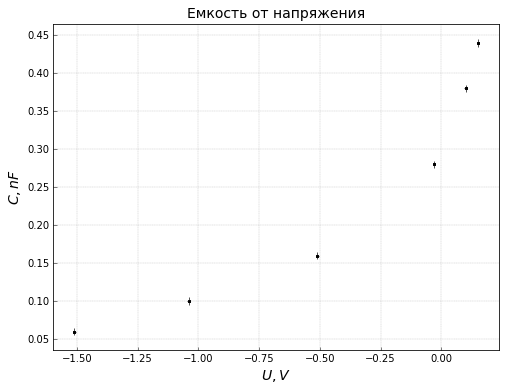

[]

In [19]:
Plotter(draw_legend=False).set_name("323CU").set_title("Емкость от напряжения").set_y_name("$C, nF$").set_x_name(
        "$U, V$"). \
        add_line(Plotter.get_new_line(y_value=tab3["C"], x_value=tab3["U"],
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True)

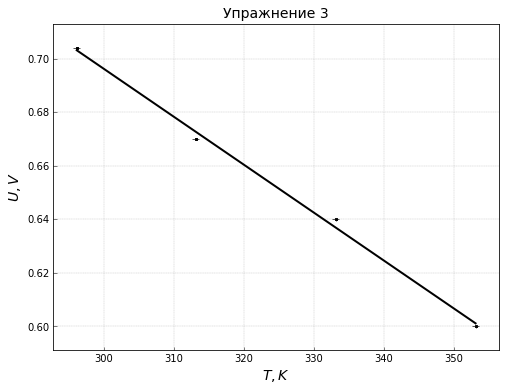

In [20]:
fit = Plotter(draw_legend=False).set_name("323TU").set_title("Упражнение 3").set_y_name("$U, V$").set_x_name(
        "$T, K$"). \
        add_line(Plotter.get_new_line(y_value=tab4["U"], x_value=tab4["t"] + 273.15,
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)

In [21]:
A = Value(values=[fit[0].a], syst=fit[0].sigma_a)
B = Value(values=[fit[0].b], syst=fit[0].sigma_b)
print("A = {}\nB = {}\nr = {}".format(A, B, fit[0].r))
#окей, это довольно близко к тории, так как B теоретический 1.2 эВ

A = -0.00179 ± 0.00007
B = 1.23 ± 0.02
r = -0.9983915282337138


In [22]:
from sympy import exp
e = 1.60217662e-19
k = 1.38e-23
I0 = (5 * 10**-3) / (A * e / k).use_func(exp)
In = I0 * (-(B * 1.602 * 10**-19) / (k * T)).use_func(exp)
print(I0)
print(In)

5e+6 ± 4e+6
5e-15 ± 7e-15


In [23]:
print(tab1.to_latex(index=False, header=["U, V", "I, mA"], bold_rows=True))
print(tab2.to_latex(index=False, header=["U, V", "I, mA"], bold_rows=True))
print(tab3.to_latex(index=False, header=["U, V", "C, nF"], bold_rows=True))
print(tab4.to_latex(index=False, header=["$t, ^{\circ}C$", "U, V"], escape=False, bold_rows=True))

\begin{tabular}{ll}
\toprule
            U, V &          I, mA \\
\midrule
 0.0000 ± 0.0005 &  0.000 ± 0.005 \\
 0.3260 ± 0.0005 &  0.000 ± 0.005 \\
 0.6120 ± 0.0005 &  0.260 ± 0.005 \\
 0.6290 ± 0.0005 &  0.420 ± 0.005 \\
 0.6400 ± 0.0005 &  0.600 ± 0.005 \\
 0.6490 ± 0.0005 &  0.800 ± 0.005 \\
 0.6550 ± 0.0005 &  0.980 ± 0.005 \\
 0.6760 ± 0.0005 &  2.060 ± 0.005 \\
 0.6880 ± 0.0005 &  3.070 ± 0.005 \\
 0.6970 ± 0.0005 &  4.070 ± 0.005 \\
 0.7040 ± 0.0005 &  5.050 ± 0.005 \\
 0.7100 ± 0.0005 &  6.120 ± 0.005 \\
\bottomrule
\end{tabular}

\begin{tabular}{ll}
\toprule
           U, V &            I, mA \\
\midrule
 -1.050 ± 0.005 &    0.000 ± 0.005 \\
 -2.050 ± 0.005 &    0.000 ± 0.005 \\
 -3.080 ± 0.005 &    0.000 ± 0.005 \\
 -4.090 ± 0.005 &    0.000 ± 0.005 \\
 -5.000 ± 0.005 &    0.000 ± 0.005 \\
 -6.090 ± 0.005 &    0.000 ± 0.005 \\
 -7.550 ± 0.005 &    0.000 ± 0.005 \\
 -7.930 ± 0.005 &   -2.080 ± 0.005 \\
 -7.940 ± 0.005 &   -4.150 ± 0.005 \\
 -7.960 ± 0.005 &   -6.650 ± 0.005 \